In [4]:
import pandas as pd
import numpy as np

In [5]:
import json

In [6]:
with open('/content/dataset-telecon.json','r') as file:
  dados_brutos = json.loads(file.read())



##Lidando com dados nulos, duplicados, vazios e cast

normalizando um objeto do tipo json

In [7]:
dados_normalizados = pd.json_normalize(dados_brutos)

In [8]:
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [9]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [10]:
dados_normalizados = np.float64(dados_normalizados['conta.cobranca.Total'])

ValueError: could not convert string to float: ' '

In [12]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' ']

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,
2308,3213-VVOLG,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.35,
2930,4075-WKNIU,nao,feminino,0,sim,sim,0.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cheque pelo correio,73.35,
3134,4367-NUYAO,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.75,
3203,4472-LVYGI,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,sim,nao,dois anos,sim,transferencia bancaria (automatica),52.55,
4169,5709-LVOEQ,nao,feminino,0,sim,sim,0.0,sim,nao,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,cheque pelo correio,80.85,


In [13]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico','conta.contrato','conta.cobranca.mensal','conta.cobranca.Total']
]


,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [14]:
idx=dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index

In [15]:
idx

Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [16]:
dados_normalizados.loc[idx,'conta.cobranca.Total']  = dados_normalizados.loc[idx,'conta.cobranca.mensal']* 24

In [17]:
dados_normalizados.loc[idx,"cliente.tempo_servico"] = 24

In [18]:
dados_normalizados.loc[idx,'conta.cobranca.Total']

,conta.cobranca.Total
975,1345.2
1775,480.0
1955,1485.6
2075,472.8
2232,486.0
2308,608.4
2930,1760.4
3134,618.0
3203,1261.2
4169,1940.4


In [19]:
dados_normalizados['conta.cobranca.Total']

,conta.cobranca.Total
0,None
1,542.4
2,280.85
3,1237.85
4,267.4
...,...
7339,7875
7340,620.55
7341,3019.25
7342,798.2


In [20]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(np.float64)

resolvido a conversao, pois, existia valor com string ' '

In [21]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

sabendo os valores unicos de cada coluna

In [22]:
for col in dados_normalizados.columns:
  print (f'coluna',{col})
  print (dados_normalizados[col].unique())
  print('-'* 30)


coluna {'id_cliente'}
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
coluna {'Churn'}
['nao' 'sim' '']
------------------------------
coluna {'cliente.genero'}
['feminino' 'masculino']
------------------------------
coluna {'cliente.idoso'}
[0 1]
------------------------------
coluna {'cliente.parceiro'}
['sim' 'nao']
------------------------------
coluna {'cliente.dependentes'}
['sim' 'nao']
------------------------------
coluna {'cliente.tempo_servico'}
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e

fazendo pelo query

In [23]:
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn']!= ''].copy()

In [24]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   object

 7118 entries, 0 to 7343 | necessário reiniciar os indices, pois, ele está pulando

In [25]:
dados_sem_vazio.reset_index(drop=True, inplace=True)

In [26]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   o

amostras duplicadas

In [27]:
filtro_duplicadas= dados_sem_vazio.duplicated()

In [28]:
dados_sem_vazio[filtro_duplicadas]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [29]:
dados_sem_vazio.drop_duplicates(inplace=True)

In [30]:
dados_sem_vazio.duplicated().sum()

np.int64(0)

dados_nulos

In [31]:
dados_sem_vazio.isna()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
dados_sem_vazio.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,8
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


In [33]:
dados_sem_vazio.isna().sum().sum()

np.int64(114)

retornar um data frame com valor nulo em pelo menos em uma das colunas.

In [34]:
dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25
751,1095-WGNGG,nao,feminino,0,sim,nao,NaN,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,1396-QWFBJ,sim,feminino,0,sim,sim,21.0,sim,nao,fibra otica,...,sim,nao,nao,nao,nao,None,sim,None,NaN,1565.70
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN


In [35]:
filtro = dados_sem_vazio['cliente.tempo_servico'].isna()

tentando recuperar essa informação de nan com outras colunas

In [36]:
dados_sem_vazio[filtro][['cliente.tempo_servico','conta.cobranca.mensal','conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [37]:
dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(
        dados_sem_vazio['conta.cobranca.Total']/ dados_sem_vazio['conta.cobranca.mensal']
    ),inplace=True
)

/tmp/ipython-input-3101953361.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_sem_vazio['cliente.tempo_servico'].fillna(


In [38]:
dados_sem_vazio[filtro][['cliente.tempo_servico','conta.cobranca.mensal','conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


In [39]:
dados_sem_vazio.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,0
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


Retirando dados nulos

em particular, a coluna conta.contrato tem 31 valores nulos vamos entender como sumir com isso.

In [40]:
dados_sem_vazio['conta.contrato'].value_counts()

,count
conta.contrato,
mes a mes,3861
dois anos,1688
um ano,1463


In [41]:
colunas_dropar = ['conta.contrato','conta.faturamente_eletronico','conta.metodo_pagamento']

In [42]:
dados_sem_vazio[colunas_dropar].isna().any(axis=1).sum()

np.int64(37)

In [43]:
df_sem_nulo = dados_sem_vazio.dropna(subset=colunas_dropar).copy()
df_sem_nulo.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [44]:
df_sem_nulo.reset_index(drop=True,inplace=True)

In [45]:
df_sem_nulo.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,0
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


## Lidando com outliers

In [46]:
df_sem_nulo.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


Cliente.tempo_servico possui um dado de 1080, sendo ele um possível candidato a outlier. Precisamos saber quem é meu Q1 e Q3

In [47]:
import seaborn as sns

<Axes: xlabel='cliente.tempo_servico'>

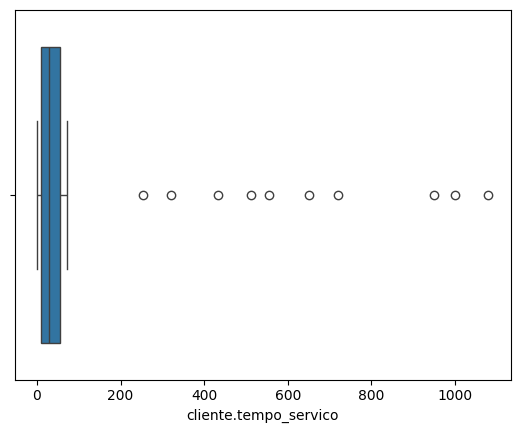

In [48]:
sns.boxplot(x=df_sem_nulo['cliente.tempo_servico'])

In [49]:
Q1 = df_sem_nulo['cliente.tempo_servico'].quantile(.25)
Q3 = df_sem_nulo['cliente.tempo_servico'].quantile(.75)
IQR = np.abs(Q1-Q3)

In [50]:
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

In [51]:
outliers_index = (df_sem_nulo['cliente.tempo_servico'] < limite_inferior) | (df_sem_nulo['cliente.tempo_servico'] > limite_superior)

In [52]:
df_sem_nulo[outliers_index]['cliente.tempo_servico']

,cliente.tempo_servico
1945,1080.0
1946,1000.0
1952,950.0
1956,254.0
1958,321.0
1963,650.0
1966,721.0
1970,555.0
1973,433.0
1974,512.0


In [53]:
df_sem_out = df_sem_nulo.copy()

In [54]:
df_sem_out.loc[outliers_index,'cliente.tempo_servico'] = np.ceil(
    df_sem_out.loc[outliers_index,'conta.cobranca.Total']/  df_sem_out.loc[outliers_index,'conta.cobranca.mensal']
)

<Axes: xlabel='cliente.tempo_servico'>

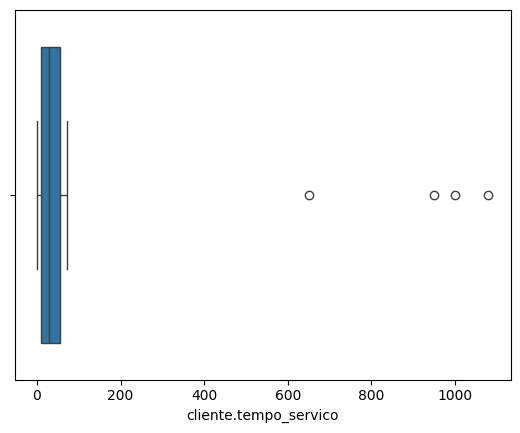

In [55]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

In [56]:
df_sem_out.loc[outliers_index,
               ['cliente.tempo_servico','conta.cobranca.mensal','conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55


Removendo outliers | Temos que refazer o filtro

In [66]:
Q1_ = df_sem_out['cliente.tempo_servico'].quantile(.25)
Q3_ = df_sem_out['cliente.tempo_servico'].quantile(.75)
IQR_ = Q3_ - Q1_

In [67]:
limite_inferior_ = Q1_ - 1.5*IQR_
limite_superior_ = Q3_ + 1.5*IQR_

In [68]:
outliers_index_ = (df_sem_out['cliente.tempo_servico'] < limite_inferior_) | (df_sem_out['cliente.tempo_servico'] > limite_superior_)

In [69]:
outliers_index_

,cliente.tempo_servico
0,False
1,False
2,False
3,False
4,False
...,...
7001,False
7002,False
7003,False
7004,False


In [71]:
df_sem_out[outliers_index_]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1945,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.9,112212.0
1946,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.9,45900.0
1952,2834-SPCJV,sim,masculino,0,sim,nao,951.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.1,79895.0
1963,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.0,47450.0


remover esses indexs

In [81]:
df_sem_out = df_sem_out[~outliers_index_]

/tmp/ipython-input-574839966.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sem_out = df_sem_out[~outliers_index_]


In [82]:
df_sem_out.reset_index(drop=True,inplace=True)

In [83]:
df_sem_out

,index,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6994,7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6995,7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
6996,7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


<Axes: xlabel='cliente.tempo_servico'>

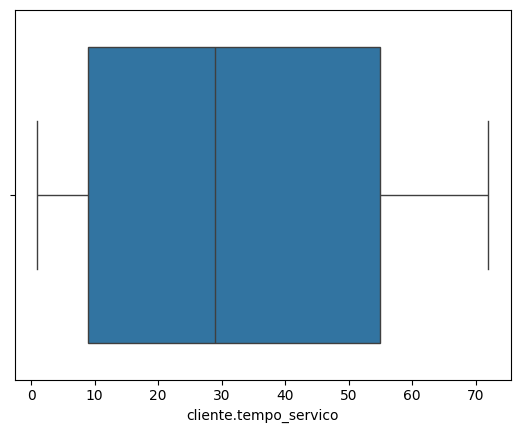

In [84]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

## Variaveis categoricas --> formas de categorizar grupos de maneiras distintas e não necessariamente de maneira quantitativa, mas de maneira qualitativa como ,por exemplo, cor dos olhos.

In [98]:
df_sem_out

,index,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6994,7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6995,7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
6996,7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [101]:
df_sem_id = df_sem_out.drop(['index','id_cliente'], axis=1).copy()

In [106]:
for col in df_sem_id.columns:
  print('coluna : ', col)
  print(f'valores {df_sem_id[col].unique()}')
  print('-'*30)

coluna :  Churn
valores ['nao' 'sim']
------------------------------
coluna :  cliente.genero
valores ['masculino' 'feminino']
------------------------------
coluna :  cliente.idoso
valores [0 1]
------------------------------
coluna :  cliente.parceiro
valores ['nao' 'sim']
------------------------------
coluna :  cliente.dependentes
valores ['nao' 'sim']
------------------------------
coluna :  cliente.tempo_servico
valores [ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
coluna :  telefone.servico_telefone
valores ['sim' 'nao']
------------------------------
coluna :  telefone.varias_linhas
valores ['sim' 'nao' 'sem servico de telefone']
------------------------------
coluna :  internet.servico_internet
valores [

In [112]:
col_bin = ['Churn','cliente.genero','cliente.parceiro','cliente.dependentes','telefone.servico_telefone','conta.faturamente_eletronico']

In [113]:
mapeamento={
    'nao':0,
    'sim':1,
    'masculino':'0',
    'feminino':'1'
}

In [114]:
df_sem_id[col_bin]=df_sem_id[col_bin].replace(mapeamento)

/tmp/ipython-input-1560844919.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sem_id[col_bin]=df_sem_id[col_bin].replace(mapeamento)


In [115]:
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,1,0,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,1,0,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,1,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0,1,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,0,1,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
6994,1,0,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
6995,0,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
6996,0,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


In [116]:
for col in df_sem_id.columns:
  print('coluna : ', col)
  print(f'valores {df_sem_id[col].unique()}')
  print('-'*30)

coluna :  Churn
valores [0 1]
------------------------------
coluna :  cliente.genero
valores ['0' '1']
------------------------------
coluna :  cliente.idoso
valores [0 1]
------------------------------
coluna :  cliente.parceiro
valores [0 1]
------------------------------
coluna :  cliente.dependentes
valores [0 1]
------------------------------
coluna :  cliente.tempo_servico
valores [ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
coluna :  telefone.servico_telefone
valores [1 0]
------------------------------
coluna :  telefone.varias_linhas
valores ['sim' 'nao' 'sem servico de telefone']
------------------------------
coluna :  internet.servico_internet
valores ['DSL' 'fibra otica' 'nao']
--------------------

One hot Enconder ou Dummy

In [118]:
s = pd.Series(list('abca'))
s

,0
0,a
1,b
2,c
3,a


In [119]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


In [122]:
df_dummies = pd.get_dummies(df_sem_id).copy()

In [124]:
df_dummies.columns

Index(['Churn', 'cliente.idoso', 'cliente.parceiro', 'cliente.dependentes',
       'cliente.tempo_servico', 'telefone.servico_telefone',
       'conta.faturamente_eletronico', 'conta.cobranca.mensal',
       'conta.cobranca.Total', 'cliente.genero_0', 'cliente.genero_1',
       'telefone.varias_linhas_nao',
       'telefone.varias_linhas_sem servico de telefone',
       'telefone.varias_linhas_sim', 'internet.servico_internet_DSL',
       'internet.servico_internet_fibra otica',
       'internet.servico_internet_nao', 'internet.seguranca_online_nao',
       'internet.seguranca_online_sem servico de internet',
       'internet.seguranca_online_sim', 'internet.backup_online_nao',
       'internet.backup_online_sem servico de internet',
       'internet.backup_online_sim', 'internet.protecao_dispositivo_nao',
       'internet.protecao_dispositivo_sem servico de internet',
       'internet.protecao_dispositivo_sim', 'internet.suporte_tecnico_nao',
       'internet.suporte_tecnico_sem servi

##Desafio 1.0

In [ ]:
with open ('/content/informacoes.json','r') as file:
  infos_json = json.load(file)


In [ ]:
info_norm = pd.json_normalize(data= infos_json, meta = 'nome',record_path = 'enderecos')

In [ ]:
info_norm

In [ ]:
with open('/content/dados.json','r') as file:
  dados = json.load(file)

In [ ]:
dados

In [ ]:
dados_norm = pd.json_normalize(dados,record_path='pessoas')

In [ ]:
dados_norm['telefones'].explode()

In [ ]:
dados_norm=  dados_norm.explode('telefones')

In [ ]:
dados_norm

In [ ]:
dados_norm = dados_norm[dados_norm['endereco.rua']!=''].copy()


In [ ]:
dados_norm.reset_index(inplace=True, drop=True)

In [ ]:
dados_norm

##desafio 2.1


In [ ]:
with open ('/content/cursos_cadastrados.json','r') as file:
  dados_curso = json.load(file)
dados_curso_norm = pd.json_normalize(dados_curso)

In [ ]:
dados_curso_norm

tratando as strings vazias. Substituir por None/NaN ---> REGEX

In [ ]:
dados_curso_norm = dados_curso_norm.replace(r'^\s*$',np.nan,regex=True)

In [ ]:
dados_curso_norm

conferindo se tem duplicados

In [ ]:
dados_curso_norm.duplicated().sum()

In [ ]:
dados_curso_norm.drop_duplicates(dados_curso_norm,inplace=True)

In [ ]:
dados_curso_norm.duplicated().sum()

lidando com os nan

In [ ]:
dados_curso_norm.isna().sum()

In [11]:
dados_curso_norm

NameError: name 'dados_curso_norm' is not defined

In [ ]:
filtro_nulo = dados_curso_norm[dados_curso_norm.isna().any(axis=1)]

In [ ]:
dados_curso_norm.dropna(inplace=True)

In [ ]:
dados_curso_norm

In [ ]:
dados_curso_norm.info()

concluintes	data_inicio	data_conclusao

In [ ]:
dados_curso_norm['data_inicio'] = pd.to_datetime(dados_curso_norm['data_inicio'])
dados_curso_norm['data_conclusao'] = pd.to_datetime(dados_curso_norm['data_conclusao'])

In [ ]:
dados_curso_norm['preco']=pd.to_numeric(dados_curso_norm['preco'])

In [ ]:
dados_curso_norm.info()

## desafio 3.1


In [85]:
import seaborn as sns

In [86]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150,
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250,
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [88]:
df['Valor da transação'].describe()

,Valor da transação
count,30.000000
mean,325.633333
std,214.442579
min,100.000000
25%,200.000000
50%,250.000000
75%,400.000000
max,913.000000


função que ira retornar os index do outliers

In [94]:
def retorna_outliers(dataframe,coluna):
  Q1 = df[coluna].quantile(.25)
  Q3 = df[coluna].quantile(.75)
  IQR = np.abs(Q3-Q1)
  limite_inferior = Q1 - 1.5*IQR
  limite_superior = Q1 + 1.5*IQR
  outlier_index = (dataframe[coluna] < limite_inferior) | (dataframe[coluna]> limite_superior)
  return outlier_index

In [95]:
indx_out = retorna_outliers(df,'Valor da transação')

In [97]:
df[indx_out]

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
23,24,600,2022-01-24,"São Paulo, Brasil"
28,29,800,2022-01-29,"Miami, EUA"


<Axes: xlabel='Valor da transação'>

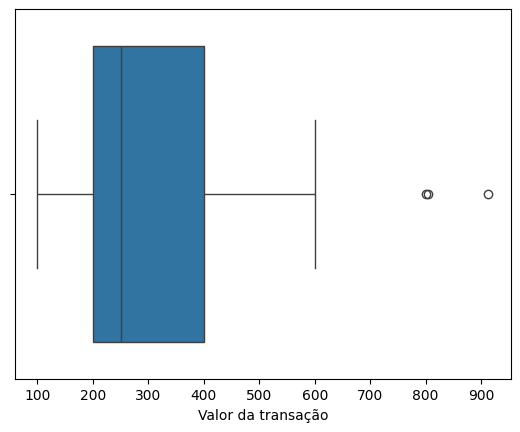

In [89]:
sns.boxplot(x=df['Valor da transação'])